- ### Import packages for analysis

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

------------------------------------------------------------------------------------------------------------------------------------------------

# Uppgift 1 - uppvärmning covid-19 data

a) Gör initial dataanalys för att snabbt få en överblick över datasetet. Använd metoder som ex. info(),
describe(), value_counts(), head(), columns, index för att snabbt få en överblick.


In [149]:
# Load in and look over the dataset:

covid19 = pd.read_excel("files/Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Veckodata Riket")
# covid19.describe()
# covid19.info()
# covid19.value_counts()
covid19.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


b) Slå ihop kolumnerna "år" och "veckonummer" till en kolumn med namn "Vecka" med följande format:


In [150]:
covid19 = covid19.astype({"veckonummer": str, "år": str})
covid19["Vecka"] = covid19["år"] + "v" + covid19["veckonummer"]
covid19_vecka = pd.DataFrame(covid19.iloc[: , 13])
covid19_vecka


,Vecka
0,2020v6
1,2020v7
2,2020v8
3,2020v9
4,2020v10
...,...
84,2021v37
85,2021v38
86,2021v39
87,2021v40


För deluppgifterna c-f, använd både Seaborn och Plotly express. För Seaborn, använd subplots så du får 2x2
grid med graferna.

- c) Rita en linjediagram som visar avlidna fall per vecka från 2020v6 till nu
- d) Rita en linjediagram som visar nya fall per vecka från 2020v6 till nu.
- e) Rita linjediagram av både avlidna fall per vecka och nya fall per vecka i samma fönster från 2020v6 till nu.
- f) Rita linjediagram av kumulativt antal fall från 2020v6 till nu.


[Text(0.5, 1.0, 'Number of cumulative falls per week from 2020v6 untill now'),
 Text(0.5, 0, 'Weeks'),
 Text(0, 0.5, 'Numbers')]

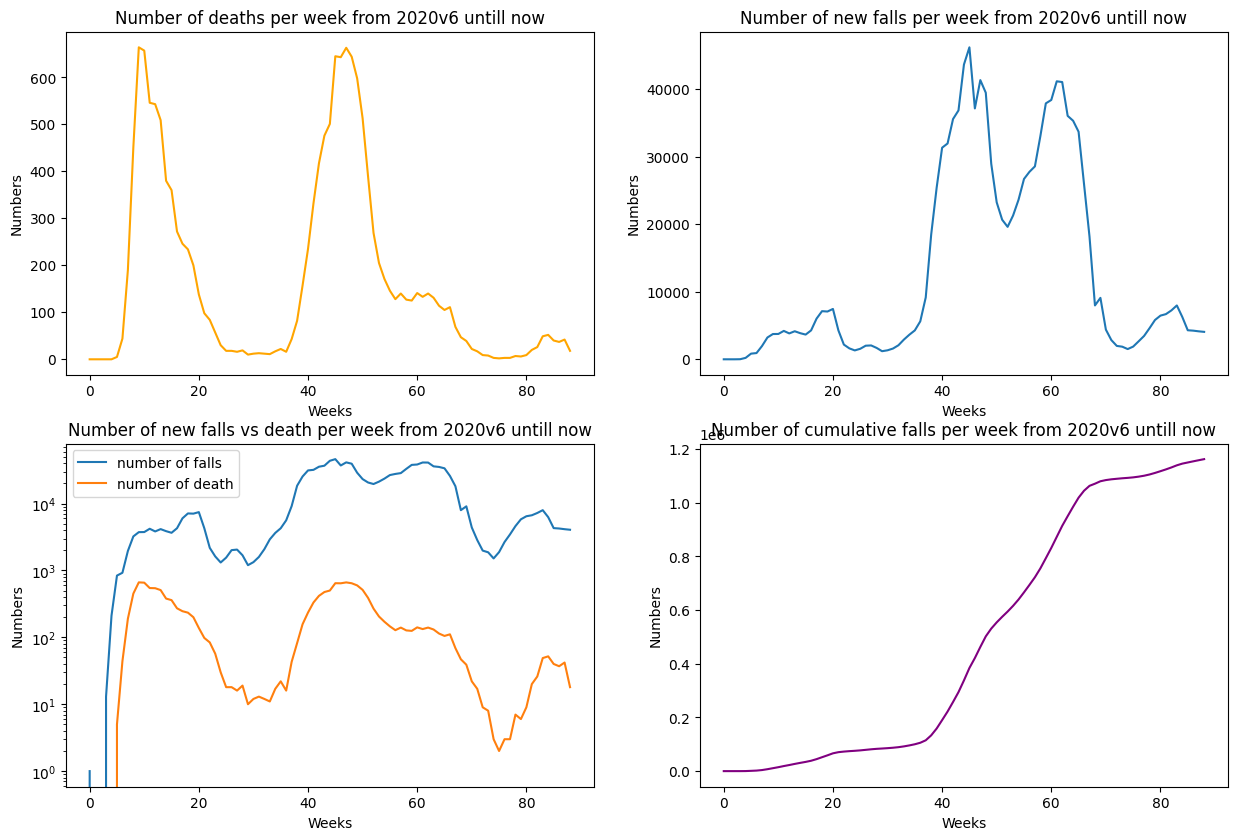

In [151]:
fig, ax = plt.subplots(2,2, dpi=100, figsize=(15,10))

sns.lineplot(data = covid19, x = covid19.index, y = "Antal_avlidna_vecka", color = "orange", ax = ax[0,0]).set(title="Number of deaths per week from 2020v6 untill now", xlabel="Weeks", ylabel="Numbers")

sns.lineplot(data = covid19, x = covid19.index, y = "Antal_fall_vecka", ax = ax[0,1]).set(title = "Number of new falls per week from 2020v6 untill now", xlabel="Weeks", ylabel="Numbers")

sns.lineplot(data = covid19, x = covid19.index, y = "Antal_fall_vecka", ax = ax[1,0])
sns.lineplot(data = covid19, x = covid19.index, y = "Antal_avlidna_vecka", ax = ax[1,0]).set(title="Number of new falls vs death per week from 2020v6 untill now", xlabel="Weeks", ylabel="Numbers")
ax[1,0].legend(labels=['number of falls', 'number of death'])
ax[1,0].set_yscale('log')

sns.lineplot(data = covid19, x = covid19.index, y = "Kum_antal_fall", color = "purple", ax = ax[1,1]).set(title="Number of cumulative falls per week from 2020v6 untill now", xlabel="Weeks", ylabel="Numbers")

----------------------------------------------------------------------------------------------------------------------------------------------------------

# Uppgift 2 - uppvärmning vaccindata


I uppgifterna nedan ska du använda dig av datasetet vaccin och bladet Vaccinerade kommun och ålder.
Använd Plotly express för att rita diagrammen nedan för de uppgifter som kräver diagram. Använd Pandas för
att svara på frågor om datasetet.
- a) Hur många län finns representerade i datasetet?

In [152]:
covid19_vaccin = pd.read_excel("files/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade kommun och ålder")
# covid19_vaccin.info()
lans = covid19_vaccin["Län_namn"].nunique()
print(f"There are {lans} Läns in the table.")


There are 21 Läns in the table.


- b) Hur många kommuner finns representerade i datasetet?

In [153]:
kommun = covid19_vaccin["Kommun_namn"].nunique()
print(f"There are {kommun} kommuns in the table.")

There are 290 kommuns in the table.


- c) Hur stor är befolkningen som är representerad i datasetet?

In [154]:
befolkning = covid19_vaccin["Befolkning"].sum()
print(f"There are total {befolkning} people in the table.")

There are total 8541497 people in the table.


- d) Beräkna hur många barn under 16 år det finns i Sverige. Du får leta upp statistik på hur stor totala
befolkningen är i Sverige.


In [155]:
barn_16 = pd.read_excel("files/Barn_under_16_Sverige_2010_08.xlsx")

# Reference: http://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__BE__BE0101__BE0101A/BefolkManad/
# The dataset is based on the uppdata in August, 2021.

barn_16 = barn_16.drop([0,1]) # Remove the NaN rows fron the table in order to list the pure columns.
barn_under_16_total = barn_16["Unnamed: 3"].sum() # Sum the total number of kids from different age group.
print(f"There are totally {barn_under_16_total} barn under 16 years old (include 16 years old) in Sweden.")


There are totally 2040480 barn under 16 years old (include 16 years old) in Sweden.


- e) Rita stapeldiagram för andel med minst 1 dos per län och andel färdigvaccinerade per län

In [156]:
covid19_vaccin_lan = covid19_vaccin.groupby(["Län_namn"]).mean()
covid19_vaccin_lan.head()

,Län,Kommun,Befolkning,Antal minst 1 dos,Antal färdigvaccinerade,Andel minst 1 dos,Andel färdigvaccinerade
Län_namn,,,,,,,
Blekinge,10.0,1077.200000,2943.622222,2549.133333,2455.488889,0.850596,0.807249
Dalarna,20.0,2054.733333,1769.777778,1537.748148,1471.762963,0.865342,0.818450
Gotland,9.0,980.000000,5651.444444,5127.000000,4928.777778,0.908334,0.872827
Gävleborg,21.0,2152.900000,2664.577778,2284.033333,2153.922222,0.848744,0.790244
Halland,13.0,1370.833333,5108.148148,4433.333333,4271.000000,0.860183,0.817189


In [157]:
px.bar(covid19_vaccin_lan, x=covid19_vaccin_lan.index, y="Andel minst 1 dos", title="Andel med minst 1 dos per län")

In [158]:
px.bar(covid19_vaccin_lan, x=covid19_vaccin_lan.index, y="Andel färdigvaccinerade", title="Andel färdigvaccinerade per län")

f) Rita ett stapeldiagram med län i x-axeln och staplar för befolkning > 16år, antal minst 1 dos och antal
färdigvaccinerade.


In [159]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_bar(name="Befolkning > 16", x=covid19_vaccin_lan.index, y=covid19_vaccin_lan["Befolkning"])

fig.add_bar(name="Antal minst 1 dos", x=covid19_vaccin_lan.index, y=covid19_vaccin_lan["Antal minst 1 dos"])

fig.add_bar(name="Antal färdigvaccinerade", x=covid19_vaccin_lan.index, y=covid19_vaccin_lan["Antal färdigvaccinerade"])

# reference: https://plotly.com/python/bar-charts/

fig.update_layout(barmode='group', title="Befolkning > 16, Antal minst 1 dos och Antal färdigvaccinerade per län")
fig.show()

-----------------------------------------------------------------------

# Uppgift 3 - KPIer & explorativ dataanalys

### 1. The cases fatality rate changed by weeks (COVID-19 in Sweden)
Here we use $\frac{death}{cases}$ $\times$ $100$ %

[Text(0.5, 1.0, 'Fatality rate(%) vs weeks (2020v6 - 2021v41)'),
 Text(0, 0.5, 'Fatality rate'),
 Text(0.5, 0, 'Weeks')]

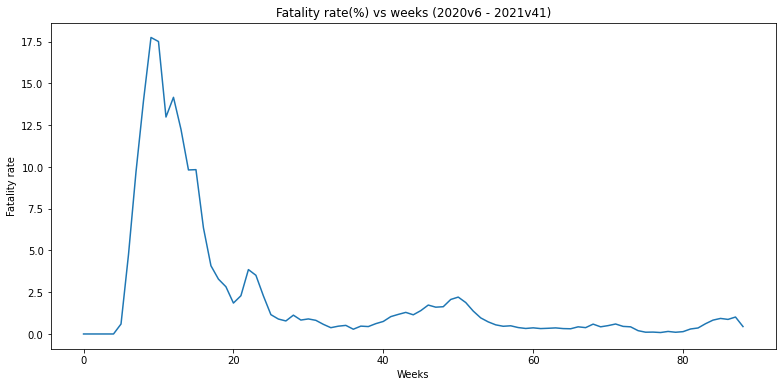

In [160]:
covid19["Fatality"] = covid19["Antal_avlidna_vecka"]/covid19["Antal_fall_vecka"]*100
covid19_fatality = pd.DataFrame(covid19.iloc[: , 14])
fig, ax = plt.subplots(figsize=(13,6))
sns.lineplot(data=covid19_fatality, x=covid19_fatality.index, y="Fatality").set(title="Fatality rate(%) vs weeks (2020v6 - 2021v41)", ylabel="Fatality rate", xlabel="Weeks")

- Discussion: Fatality maybe not accurate because the infective patients are only confirmed(tested) cases.

### 2. Distribution of cases fatality rates among different age groups

[Text(0.5, 1.0, 'Fatality tates (%) in different age groups'),
 Text(0.5, 0, 'Age groups')]

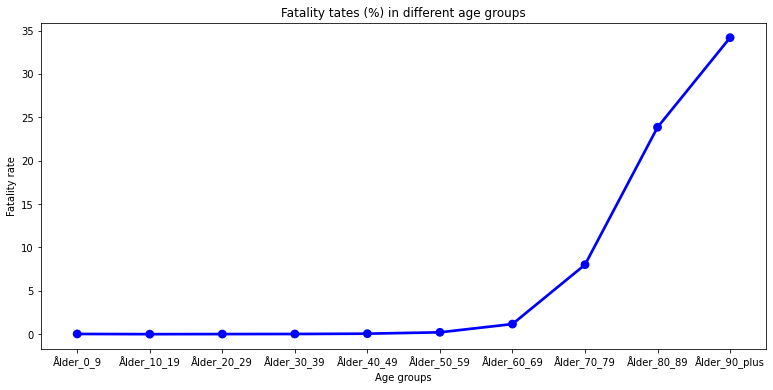

In [161]:
covid19_age_group = pd.read_excel("files/Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Totalt antal per åldersgrupp").drop([10]) # Missing value deleted
covid19_age_group["Fatality rate"] = covid19_age_group["Totalt_antal_avlidna"]/covid19_age_group["Totalt_antal_fall"]*100

fig, ax = plt.subplots(figsize=(13,6))
sns.pointplot(data=covid19_age_group, x="Åldersgrupp", y="Fatality rate", color="blue").set(title="Fatality tates (%) in different age groups", xlabel="Age groups")

- Discussion: The graph shows that the fatality rate increases significantly above 60 years old age group.

### 3. The impact of vaccination to control COVID-19. (Weekly cases vs. total vaccineded)

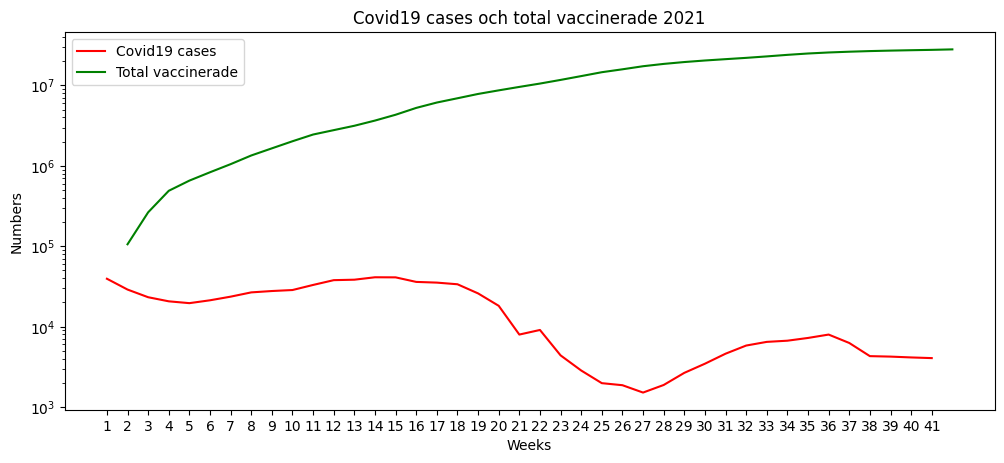

In [162]:
# Delete the covid19 data in 2020 and we assumed the vaccine project in Sweden was started in 2021
covid19_2021 = covid19.drop(labels=range(48)).reset_index() 

# Load the data from vaccine time series (total number of the people who took the vaccine) from 2021
covid19_vaccin_time_series = pd.read_excel("files/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinationer tidsserie")
covid19_vaccin_time_series = covid19_vaccin_time_series.groupby("Vecka").sum().reset_index()
covid19_vaccin_time_series = covid19_vaccin_time_series.drop([41,42])

fig, axes = plt.subplots(dpi=100, figsize=(12,5))
sns.lineplot(data=covid19_2021, x="veckonummer", y="Antal_fall_vecka", color="red")
sns.lineplot(data=covid19_vaccin_time_series, x="Vecka", y="Antal vaccinationer", color="green").set(title="Covid19 cases och total vaccinerade 2021", xlabel="Weeks", ylabel="Numbers")
axes.set_yscale('log') # We use "log(y)" to give a better performance 
axes.legend(labels=['Covid19 cases', 'Total vaccinerade'])


- Discussion: The charts show that the vaccination has a positive effect on the control of the epidemic.

### 4. Total proportion of vaccineded Dose-1 and Dose-2 in different age groups

In [170]:
covid19_vaccin_age = pd.read_excel("files/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade kommun och ålder").groupby("Ålder").mean().reset_index()

fig = go.Figure()

fig.add_bar(name="Andel minst 1 dos", x=covid19_vaccin_age["Ålder"], y=covid19_vaccin_age["Andel minst 1 dos"])
fig.add_bar(name="Andel färdigvaccinerade", x=covid19_vaccin_age["Ålder"], y=covid19_vaccin_age["Andel färdigvaccinerade"])

fig.update_layout(barmode='group', title="Andel minst 1 dos och Andel färdigvaccinerade per age group")
fig.show()

- Discussion: Vaccine in older groups are more well taken than younger. It can be reflexed to the infection rate and fatality rate.